In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("OPCleaver.csv")
df = df.drop('FileName', 1)

In [2]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SectionAlignment,112.0,7.131429e+03,1.802302e+03,4096.0,4096.0,8192.0,8192.0,8.192000e+03
FileAlignment,112.0,5.760000e+02,4.767699e+02,512.0,512.0,512.0,512.0,4.096000e+03
SizeOfHeaders,112.0,7.268571e+02,6.016538e+02,512.0,512.0,512.0,1024.0,4.096000e+03
ImageBase,112.0,7.141552e+07,5.096470e+08,4194304.0,4194304.0,4194304.0,4194304.0,5.368709e+09
SizeOfImage,112.0,2.019913e+06,4.737946e+06,32768.0,98304.0,196608.0,1318912.0,1.782579e+07
DllCharacteristics,112.0,3.294686e+04,5.509797e+03,0.0,33088.0,34112.0,34112.0,3.411200e+04
Characteristics,112.0,8.371786e+02,2.121284e+03,2.0,258.0,258.0,258.0,8.450000e+03
HighEntropy,112.0,3.571429e-01,4.813110e-01,0.0,0.0,0.0,1.0,1.000000e+00
LowEntropy,112.0,7.946429e-01,4.057779e-01,0.0,1.0,1.0,1.0,1.000000e+00
TotalSuspiciousSections,112.0,1.062500e+00,6.881395e-01,0.0,1.0,1.0,1.0,6.000000e+00


In [3]:
#DataFrame with columns
columns = pd.DataFrame(list(df.columns.values[1:]))

#DataFrame with data types
data_types = pd.DataFrame(df.dtypes, columns=['Data Type'])

#DataFrame with Count
data_count = pd.DataFrame(df.count(), columns=['Count'])

#DataFrame with unique values
unique_value_counts = pd.DataFrame(columns=['Unique Values'])
for v in list(df.columns.values):
    unique_value_counts.loc[v] = [df[v].nunique()]

#DataFrame with minimum values
minimum_values = pd.DataFrame(columns=['Minimum Values'])
for v in list(df.columns.values):
    minimum_values.loc[v] = [df[v].min()]

#DataFrame with maximum values
maximum_values = pd.DataFrame(columns=['Maximum Values'])
for v in list(df.columns.values):
    maximum_values.loc[v] = [df[v].max()]
        
data_quality_report = data_types.join(data_count).join(unique_value_counts).join(minimum_values).join(maximum_values)
print('Data Quality Report')
data_quality_report


Data Quality Report


,Data Type,Count,Unique Values,Minimum Values,Maximum Values
SectionAlignment,int64,112,2,4096,8192
FileAlignment,int64,112,2,512,4096
SizeOfHeaders,int64,112,3,512,4096
TimeDateStamp,object,112,85,0x41D2F254 [Wed Dec 29 18:07:16 2004 UTC],0x541A09B7 [Wed Sep 17 22:22:47 2014 UTC]
ImageBase,int64,112,4,4194304,5368709120
SizeOfImage,int64,112,41,32768,17825792
DllCharacteristics,int64,112,5,0,34112
Characteristics,int64,112,6,2,8450
HighEntropy,int64,112,2,0,1
LowEntropy,int64,112,2,0,1


# Visualizing Data

Visualyzing *Characteristics* feature

In [7]:
values = df['Characteristics'].value_counts().keys().tolist()
counts = df['Characteristics'].value_counts().tolist()
ids = [x for x in range(len(values))]

In [8]:
print(ids)

[0, 1, 2, 3, 4, 5]


<BarContainer object of 6 artists>

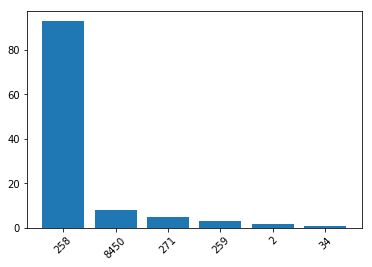

In [9]:
plt.xticks(ids, values, rotation='45')
plt.bar(ids,counts)

Visualyzing *DllCharacteristics* feature

In [10]:
values = df['DllCharacteristics'].value_counts().keys().tolist()
counts = df['DllCharacteristics'].value_counts().tolist()
ids = [x for x in range(len(values))]

<BarContainer object of 5 artists>

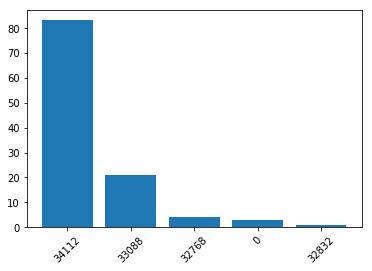

In [11]:
plt.xticks(ids, values, rotation='45')
plt.bar(ids,counts)

Visualyzing three features *Characteristics, DllCharacteristics, ImageBase*

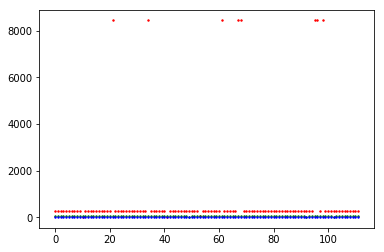

In [12]:
x = df.index.tolist()
y1 = df['Characteristics'].tolist()
y2 = (df['DllCharacteristics']/1000).tolist()
y3 = (df['ImageBase']/1000000000).tolist()

plt.scatter(x,y1,s=2, label="Total Suspicious Sections", color="r")
plt.scatter(x,y2,s=2, label="Total Suspicious Sections", color="g")
plt.scatter(x,y3,s=2, label="Total Suspicious Sections", color="b")

plt.show()